# Abandono y Éxito Académico: Un Enfoque Estadístico
## Tema
El tema de nuestro proyecto es el análisis estadístico del abandono escolar y el éxito académico 
en estudiantes de educación superior, utilizando datos reales obtenidos de Kaggle.

Las incógnitas formuladas para su estudio son:
1. ¿Existen diferencias estadísticamente significativas o patrones en el rendimiento académico 
   entre estudiantes que abandonan y aquellos que completan sus estudios?
2. ¿Qué variables socioeconómicas y académicas influyen de forma más significativa 
   en la probabilidad de abandono y en el éxito académico?
3. ¿Es posible predecir el abandono académico o el éxito de un estudiante utilizando 
   técnicas estadísticas y de clasificación?

## Importación de los módulos usados para el estudio posterior
En estos seis módulos se concentra todo el proceso y pipeline que da respuesta a las preguntas de investigación:

- `data_preparation`: carga y limpia los datos, trata valores faltantes, normaliza y transforma variables, codifica categorías y genera conjuntos de entrenamiento y prueba reproducibles.
- `descriptive_stats`: obtiene estadísticas descriptivas (medias, medianas, desviaciones), tablas por grupos (abandono vs éxito), y realiza pruebas básicas para detectar diferencias significativas entre grupos.
- `data_visualization`: produce visualizaciones exploratorias (histogramas, boxplots, diagramas de dispersión, mapas de calor) para identificar patrones, correlaciones y valores atípicos que orienten el análisis.
- `pattern_discovery`: aplica métodos de descubrimiento de patrones y segmentación (clustering, análisis de asociación) para identificar perfiles de estudiantes y reglas relacionadas con el abandono.
- `performance_analysis`: analiza el rendimiento académico en profundidad, evalúa la influencia de variables socioeconómicas y académicas, y realiza análisis por cohortes o temporal cuando sea posible.
- `predicting_success`: construye y evalúa modelos predictivos (regresión logística), realiza selección de variables y validación cruzada para estimar riesgo de abandono y probabilidad de éxito.

Cada módulo genera artefactos (dataframes, figuras, modelos y métricas) que se integran en este cuaderno para la interpretación de resultados.

In [1]:
from pathlib import Path
import sys
# Asegura que la carpeta 'scripts' esté en el path (notebook está en /notebook)
scripts_dir = Path('..') / 'scripts'
sys.path.insert(0, str(scripts_dir.resolve()))
# Importar los módulos de scripts (todos los scripts disponibles)
import data_preparation
import descriptive_stats
import data_visualization
import pattern_discovery
import performance_analysis
import predicting_success
import pandas as pd
# Cargar dataset (ahora en la primera celda de código para disponibilidad global)
df = pd.read_csv(str(Path('..') / 'dataset' / 'dataset.csv'), encoding='utf-8', low_memory=False)
print("Módulos importados y dataset cargado correctamente.")

Módulos importados y dataset cargado correctamente.


## Análisis exploratorio de los datos
En esta etapa se examinan estadísticos descriptivos que permiten identificar tendencias centrales, niveles de dispersión y posibles anomalías. Además, se emplean visualizaciones esenciales como histogramas, boxplots y gráficos de dispersión para revelar patrones, relaciones entre variables y valores atípicos que podrían influir en el análisis posterior. Esta exploración inicial ofrece una visión preliminar que orienta las preguntas de nuestra investigación

### Estadísticos descriptivos
Para cada una de nuestras variables se muestra la media, mediana, moda, mínimo, máximo, rango, varianza, desviación estandar y rango intercuartílico

In [2]:
# Ejecutar la función principal de descriptive_stats directamente
descriptive_stats.main(str(Path('..') / 'dataset' / 'dataset.csv'), str(Path('..') / 'outputs'))

Variable: Marital status
media aritmética: 1.1785714285714286
mediana: 1.0
moda: 1
medidas de dispersión: minimo: 1.0, maximo: 6.0, rango: 5.0
varianza: 0.3669293627466554
desviación estándar: 0.6057469461306886
rango intercuartílico: 0.0

Variable: Application mode
media aritmética: 6.886980108499096
mediana: 8.0
moda: 1
medidas de dispersión: minimo: 1.0, maximo: 18.0, rango: 17.0
varianza: 28.079016516899596
desviación estándar: 5.298963721040143
rango intercuartílico: 11.0

Variable: Application order
media aritmética: 1.7278481012658229
mediana: 1.0
moda: 1
medidas de dispersión: minimo: 0.0, maximo: 9.0, rango: 9.0
varianza: 1.7260522527523403
desviación estándar: 1.3137930783621674
rango intercuartílico: 1.0

Variable: Course
media aritmética: 9.899186256781194
mediana: 10.0
moda: 12
medidas de dispersión: minimo: 1.0, maximo: 17.0, rango: 16.0
varianza: 18.764421675452194
desviación estándar: 4.33179197047275
rango intercuartílico: 7.0

Variable: Daytime/evening attendance
medi

### Visualización de datos
Para facilitar la interpretación de los volúmenes con los que trabajamos, se presenta a continuación un gráfico de pastel que resume su distribución.

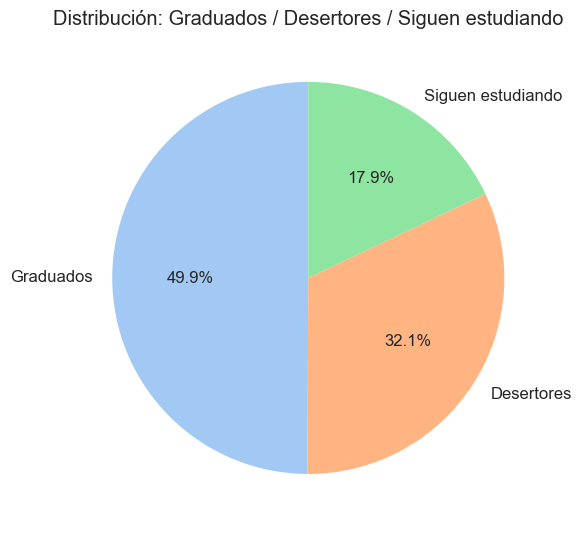

Gráfico de pastel guardado en: ..\outputs\data_visualization\pie_Target.png


In [16]:
# Genera y muestra el gráfico
out = Path('..') / 'outputs' / 'data_visualization'
data_visualization.generate_target_piechart(df, out, target_col='Target', show=True)

Se hace uso de histogramas, boxplots y gráficos de dispersión para revelar distribuciones, relaciones entre variables y posibles valores atípicos. Todas las variables se representan mediante histogramas y diagramas de caja. Asimismo, se visualizan todas las combinaciones posibles mediante gráficos de dispersión

In [17]:
# Ejecutar la función principal de data_visualization directamente
data_visualization.main(str(Path('..') / 'dataset' / 'dataset.csv'), str(Path('..') / 'outputs' / 'data_visualization'))

Gráfico de pastel guardado en: ..\outputs\data_visualization\pie_Target.png
Gráficas generadas exitosamente en: ..\outputs\data_visualization


Para una mirada preliminar podríamos observar el comportamiento del rendimiento académico de los estudiantes que se graduaron en comparación con aquellos que desertaron (primer y segundo semestre):

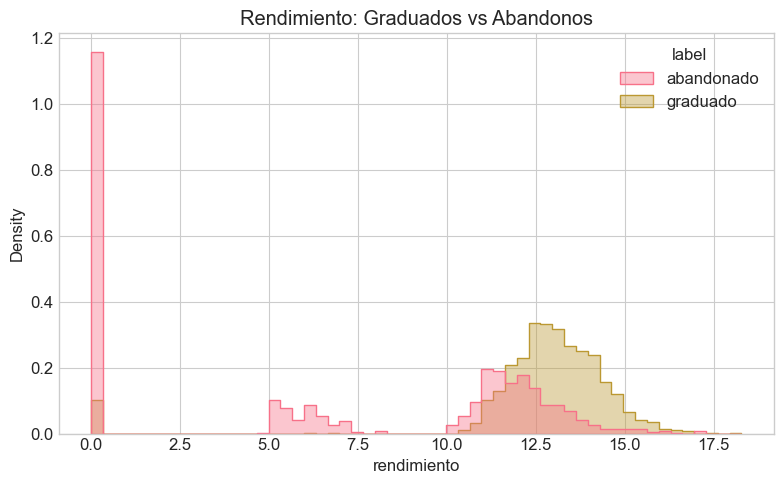

Histograma superpuesto guardado en: ..\outputs\data_visualization\overlaid_rendimiento_Target.png


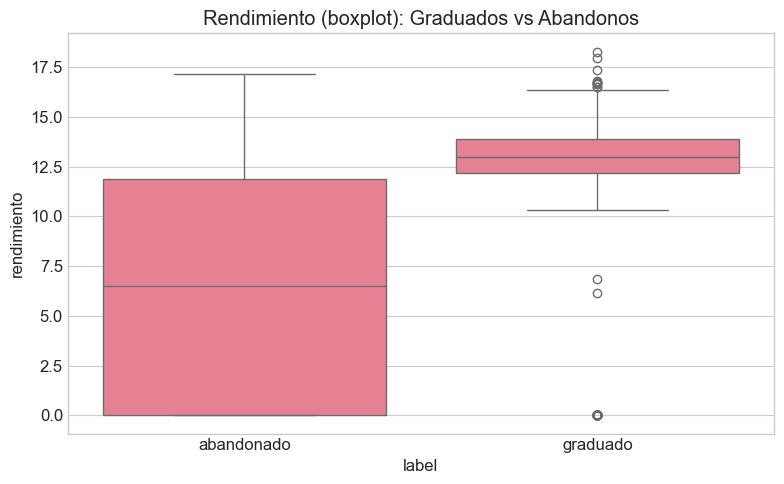

Boxplot superpuesto guardado en: ..\outputs\data_visualization\overlaid_rendimiento_box_Target.png


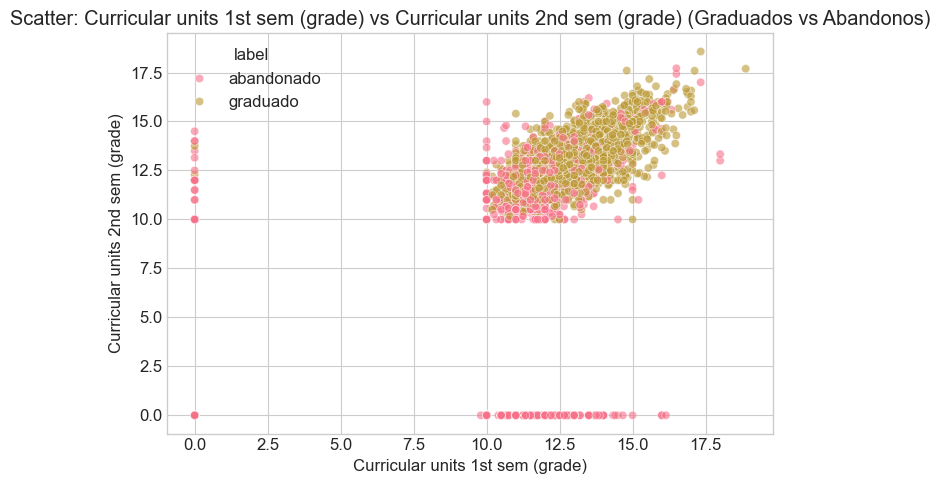

Scatterplot superpuesto guardado en: ..\outputs\data_visualization\overlaid_rendimiento_scatter_Target.png


In [3]:
# Crear carpeta de salida si no existe
out = Path('..') / 'outputs' / 'data_visualization'
out.mkdir(parents=True, exist_ok=True)
# Llamar a las tres funciones de visualización
data_visualization.generate_overlaid_rendimiento_histogram(df, out, show=True)
data_visualization.generate_overlaid_rendimiento_boxplot(df, out, show=True)
data_visualization.generate_overlaid_rendimiento_scatter(df, out, show=True)

### Preparación de Datos
Se efectuaron los ajustes necesarios para asegurar que la información se encontrara en un estado adecuado para su análisis subsiguiente. Estas operaciones incluyeron, entre otros procedimientos, la gestión de datos incompletos, la transformación de variables categóricas en representaciones susceptibles de análisis y la estandarización de los atributos de tipo numérico.

In [4]:
# Ejecutar la preparación de datos
data_preparation.prepare_data(
    input_path=str(Path('..') / 'dataset' / 'dataset.csv'),
    output_dir=str(Path('..') / 'outputs' / 'prepared_data')
)

🔧 PREPARACIÓN DE DATOS - Pipeline de Transformaciones

📂 Cargando datos desde: ..\dataset\dataset.csv
   Dimensiones: 4,424 filas × 35 columnas

📋 PASO 1: Análisis y Manejo de Valores Faltantes

✅ No se encontraron valores faltantes en el dataset

📋 PASO 2: Identificación de Tipos de Variables

   Variables categóricas (codificadas): 9
   Variables binarias: 8
   Variables numéricas continuas: 17
   Variable objetivo: ['Target']

📋 PASO 3: Codificación de Variable Objetivo
✓ Variable objetivo 'Target' codificada:
    Dropout → 0
    Enrolled → 1
    Graduate → 2

📋 PASO 4: Estandarización de Variables Numéricas

   Método seleccionado: zscore
   Justificación: Permite comparar variables en diferentes escalas

✓ Application order: estandarizado con método 'zscore'
✓ Age at enrollment: estandarizado con método 'zscore'
✓ Curricular units 1st sem (credited): estandarizado con método 'zscore'
✓ Curricular units 1st sem (enrolled): estandarizado con método 'zscore'
✓ Curricular units 1st se

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (evaluations)_outlier,Curricular units 1st sem (approved)_outlier,Curricular units 1st sem (grade)_outlier,Curricular units 1st sem (without evaluations)_outlier,Curricular units 2nd sem (credited)_outlier,Curricular units 2nd sem (enrolled)_outlier,Curricular units 2nd sem (evaluations)_outlier,Curricular units 2nd sem (approved)_outlier,Curricular units 2nd sem (grade)_outlier,Curricular units 2nd sem (without evaluations)_outlier
0,1,8,5,2,1,1,1,13,10,6,...,0,0,1,0,0,1,0,0,1,0
1,1,6,1,11,1,1,1,1,3,4,...,0,0,0,0,0,0,0,0,0,0
2,1,1,5,5,1,1,1,22,27,10,...,0,0,1,0,0,0,0,0,1,0
3,1,8,2,15,1,1,1,23,27,6,...,0,0,0,0,0,0,0,0,0,0
4,2,12,1,3,0,1,1,22,28,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,0,0,0,0,0,0,0,0
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,0,0,0,0,0,0,0,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,0,0,0,0,0,0,0,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,0,0,0,0,0,0,0,0


## ¿Existen diferencias estadísticamente significativas o patrones en el rendimiento académico?

Para abordar esta interrogante, es necesario establecer previamente una definición operativa de “rendimiento” a partir de las variables disponibles en nuestro conjunto de datos.

**Tasa de aprobación (rendimiento):**

$$\text{Tasa de aprobación} = \frac{\text{Materias aprobadas}}{\text{Materias matriculadas}}$$

En consecuencia, considerando el grupo de estudiantes que culminaron sus estudios y el grupo que presentó abandono académico, se formula la siguiente prueba de hipótesis:

- **H0:** No hay diferencia significativa en el rendimiento entre los grupos.
- **H1:** Existe una diferencia significativa en el rendimiento entre los grupos.

Para este propósito, es necesario aplicar pruebas de normalidad que permitan determinar el tipo de contraste estadístico adecuado. En consecuencia, se establece una prueba de hipótesis específica para evaluar la normalidad de las distribuciones involucradas:
- **H0:** Los datos siguen una distribución normal
- **H1:** Los datos NO siguen una distribución normal

> **Nota:** En ambos procedimientos se adoptará un nivel de significancia $\\alpha = 0.05$ como criterio de referencia para la toma de decisiones estadísticas.


In [5]:
from pathlib import Path
import importlib
# Recargar el módulo para obtener los cambios
importlib.reload(performance_analysis)
# Ejecutar el análisis de rendimiento
out = Path('..') / 'outputs' / 'performance_analysis'
out.mkdir(parents=True, exist_ok=True)
_ = performance_analysis.main(
    input_path=str(Path('..') / 'dataset' / 'dataset.csv'),
    output_dir=str(out)
)


   ANÁLISIS DE RENDIMIENTO ACADÉMICO: ABANDONO vs GRADUACIÓN
   Pregunta: ¿Existe diferencia significativa en el rendimiento?
✓ Directorios de salida creados: ..\outputs\performance_analysis

1️⃣  CARGA DE DATOS
✓ Dataset cargado: ..\dataset\dataset.csv
  - Filas: 4,424
  - Columnas: 35

2️⃣  IDENTIFICACIÓN DE GRUPOS

Valores únicos en 'Target': ['Dropout' 'Graduate' 'Enrolled']

Distribución de Target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

⚠️  Nota: Se encontraron 794 estudiantes 'Enrolled' (aún activos)
    Estos NO se incluyen en el análisis comparativo Dropout vs Graduate

📊 Resumen de grupos para análisis:
  • Grupo ABANDONO (Dropout):      1,421 estudiantes (32.1%)
  • Grupo NO ABANDONO (Graduate):  2,209 estudiantes (49.9%)

3️⃣  CREACIÓN DE VARIABLE DE RENDIMIENTO

📋 Columnas utilizadas:
  - Aprobadas: 'Curricular units 1st sem (approved)'
  - Matriculadas: 'Curricular units 1st sem (enrolled)'

📊 Estadísticas de Tasa de Aprobació

Como se evidencia en los resultados, la distribución de los datos no cumple con el supuesto de normalidad, por lo que se descartó la aplicación de una prueba t de Student y se optó por el contraste no paramétrico de Mann‑Whitney U. Dicho análisis proporcionó evidencia suficiente para rechazar la hipótesis nula. En consecuencia, se concluye que existe una diferencia estadísticamente significativa en el rendimiento académico entre los estudiantes que se graduaron y aquellos que abandonaron sus estudios.
> **Nota:** Los resultados y valores obtenidos pueden consultarse en el reporte generado en el archivo analysis_report.json

## ¿Qué variables socioeconómicas y académicas influyen de forma más significativa en la probabilidad de abandono y en el éxito académico?

Para responder a esta interrogante necesitamos identificar grupos naturales en los datos, para ello emplearemos la técnica de clustering cuyo objetivo es agrupar observaciones similares en función de sus características, este consiste en particionar un conjunto de datos en grupos (clusters) de manera que los elementos dentro de un mismo cluster sean lo más similares posible entre sí y los elementos de clusters distintos sean lo más diferentes posible.


In [6]:
# Ejecutar pattern_discovery.main() desde la raíz del proyecto
from pathlib import Path
import sys, os, importlib
# Añadir 'scripts' al path
scripts_dir = Path('..') / 'scripts'
sys.path.insert(0, str(scripts_dir.resolve()))
import pattern_discovery
importlib.reload(pattern_discovery)
# Cambiar cwd a la raíz del proyecto para que las rutas relativas del script funcionen correctamente
project_root = Path('..').resolve()
os.chdir(str(project_root))
prepared = project_root / 'outputs' / 'prepared_data' / 'dataset_prepared.csv'
if not prepared.exists():
    print(f'Archivo preparado no encontrado: {prepared}. Ejecuta la celda de preparación de datos primero.')
else:
    df, report = pattern_discovery.main()
    print(f'pattern_discovery completado. Resultados en: {pattern_discovery.OUTPUT_DIR}')


  ANÁLISIS DE PATRONES: DROPOUT vs GRADUATE
  Identificación de patrones específicos por grupo
✓ Directorios creados: outputs/pattern_analysis

📊 CARGA Y PREPARACIÓN DE DATOS

✓ Dataset cargado: 4,424 registros totales
✓ Filtrado a Dropout/Graduate: 3,630 registros

  - Dropout:  1,421
  - Graduate: 2,209

👥 ANÁLISIS 1: PATRONES DEMOGRÁFICOS Y SOCIOECONÓMICOS

──────────────────────────────────────────────────────────────────────
PATRONES DEMOGRÁFICOS - DROPOUT
──────────────────────────────────────────────────────────────────────

Marital status:
  • Soltero/a: 83.3%
  • Casado/a: 12.6%
  • Divorciado/a: 3.0%

Gender:
  • Masculino: 50.7%
  • Femenino: 49.3%

Scholarship holder:
  • No: 90.6%
  • Sí: 9.4%

Debtor:
  • No: 78.0%
  • Sí: 22.0%

Tuition fees up to date:
  • Al día: 67.8%
  • Atrasado: 32.2%

Displaced:
  • No: 52.9%
  • Sí: 47.1%

Daytime/evening attendance:
  • Diurno: 85.4%
  • Nocturno: 14.6%

Edad promedio al matricularse: 26.1 años

────────────────────────────────

### Interpretación de los resultados: Abandono vs Éxito académico

#### 1. Estado civil
- El abandono se concentra más en estudiantes casados o divorciados (15.6%) frente a 8.2% en el grupo graduado.  
- Los graduados son mayoritariamente solteros (91.2%), lo que sugiere que mayores responsabilidades familiares podrían asociarse a mayor riesgo de abandono.

#### 2. Género
- Dropout: 50.7% hombres / 49.3% mujeres (prácticamente equilibrado).  
- Graduate: predominio masculino (75.2%).
- Interpretación: puede indicar mayor tasa de abandono en mujeres o mayor probabilidad de graduación en hombres en este conjunto.

#### 3. Becas (Scholarship holder)
- Dropout: 9.4% con beca.
- Graduate: 37.8% con beca.
- Implicación: el apoyo financiero parece ser un factor protector importante.

#### 4. Deudas (Debtor)
- Dropout: 22% con deudas.
- Graduate: 4.6% con deudas.
- Conclusión: la presencia de deudas se asocia claramente con mayor probabilidad de abandono.

#### 5. Pago de matrícula al día
- Dropout: 32.2% con pagos atrasados.
- Graduate: 1.3% con pagos atrasados.
- Nota: uno de los indicadores más fuertes — la morosidad financiera correlaciona fuertemente con abandono.

#### 6. Condición de “Displaced”
- Dropout: 47.1% desplazados.
- Graduate: 59.9% desplazados.
- Observación: ser “displaced” no incrementa el abandono; en este dataset aparece más en graduados.

#### 7. Turno (Diurno / Nocturno)
- Mayor presencia de estudiantes nocturnos en Dropout (14.6%) que en Graduate (9.1%).
- Contexto: el turno nocturno suele asociarse a estudiantes que trabajan, lo cual puede aumentar la carga y el riesgo de abandono.

#### 8. Edad al matricularse
- Dropout: 26.1 años (promedio).
- Graduate: 21.8 años (promedio).
- Interpretación: mayor edad → más responsabilidades → mayor probabilidad de interrupción académica.

---

### Conclusiones principales
- Factores asociados al abandono:
  - Mayor edad al ingreso
  - Ausencia de beca
  - Presencia de deudas
  - Pagos de matrícula atrasados
  - Mayor proporción de estudiantes nocturnos
  - Mayor proporción de estudiantes con responsabilidades familiares (casados/divorciados)

- Factores asociados a la graduación:
  - Más jóvenes
  - Mayormente solteros
  - Con apoyo financiero (beca)
  - Sin deudas y con pagos al día
  - Mayor presencia masculina
  - Más frecuentemente desplazados (en este dataset)

Estos patrones sugieren que las condiciones financieras y la edad son los predictores demográficos más fuertes del abandono, mientras que el apoyo institucional (becas) y la estabilidad económica favorecen la permanencia.

> **Nota:** Los gráficos y visualizaciones generadas durante el análisis se encuentran en el directorio outputs/pattern_analysis.



## ¿Es posible predecir el abandono académico o éxitos de un estudiante utilizando técnicas estadísticas y de clasificación?

El abandono o la culminación exitosa constituyen una variable categórica binaria en este estudio (1 = Graduate, 0 = Dropout). En consecuencia, para alcanzar el objetivo analítico es necesario emplear un modelo estadístico orientado a la clasificación binaria.

Las técnicas de clasificación, como la regresión logística, son métodos estadísticos diseñados para predecir una categoría o clase a partir de un conjunto de variables y satisface nuestro requerimiento de efectuar una clasificación binaria. Su propósito es estimar la probabilidad de que una observación pertenezca a una de las dos clases.

### Regresión logística

La regresión logística modela la probabilidad de un evento mediante la **función logística (sigmoide)**:

$$\displaystyle P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \dots + \beta_k X_k)}}$$

Donde:

- **$Y$** es la clase a predecir (por ejemplo, *Dropout = 0*, *Graduate = 1*).
- **$X_1, X_2, \dots, X_k$** son las variables predictoras.
- **$\beta_0, \beta_1, \dots, \beta_k$** son los coeficientes del modelo.

A diferencia de la regresión lineal tradicional, cuyos coeficientes se estiman mediante el método de mínimos cuadrados, en la regresión logística los parámetros se obtienen mediante el procedimiento de máxima verosimilitud visto en clases.





In [8]:
# Ejecutar el análisis de predicción de éxito/abandono académico
from pathlib import Path
import importlib
# Recargar el módulo para obtener los cambios
importlib.reload(predicting_success)
# Ejecutar el análisis predictivo
_ = predicting_success.main()


  PREDICCIÓN DE ÉXITO/ABANDONO ACADÉMICO ESTUDIANTIL
  Modelo: Regresión Logística

📅 Fecha de ejecución: 2026-01-12 15:06:03
LOADING AND PREPARING DATA FOR CLASSIFICATION

📊 Dataset original shape: (4424, 67)

📈 Distribución original de la variable Target:
   - Graduate: 2209 (49.9%)
   - Dropout: 1421 (32.1%)
   - Enrolled: 794 (17.9%)

📊 Dataset filtrado (solo Dropout y Graduate): (3630, 67)

📈 Distribución del dataset filtrado:
   - Graduate: 2209 (60.9%)
   - Dropout: 1421 (39.1%)

🔧 Features seleccionadas para el modelo: 34

📊 División de datos:
   - Conjunto de entrenamiento: 2904 (80%)
   - Conjunto de prueba: 726 (20%)

📊 Distribución en entrenamiento:
   - Graduados: 1767 (60.8%)
   - Deserción: 1137 (39.2%)

ENTRENAMIENTO DEL MODELO DE REGRESIÓN LOGÍSTICA

✅ Modelo entrenado exitosamente
   - Regularización: L2 (Ridge)
   - Solver: LBFGS
   - Class weight: Balanced

VALIDACIÓN CRUZADA (5-FOLD)

📊 Resultados de Validación Cruzada (5 folds):

   Métrica              Media   D

> **Nota:** Se sugiere conultar la carpeta outputs/prediction_results la cual contiene las visualizaciones y métricas del desempeño del modelo que permiten interpretar qué variables aumentan o reducen el riesgo de dropout, en otras palabras, qué variables influyen más en la predicción.


## Conclusiones Generales

### Respuestas a las Preguntas de Investigación

#### **1. ¿Existen diferencias estadísticamente significativas en el rendimiento académico?**

Sí. La prueba de Mann-Whitney U rechazó la hipótesis nula ($\alpha = 0.05$), confirmando que los estudiantes graduados presentan tasas de aprobación significativamente superiores a quienes abandonaron. Esta diferencia no es producto del azar, sino que refleja un patrón sistemático: los estudiantes que completan sus estudios mantienen un rendimiento académico consistentemente más alto desde el primer semestre. El análisis de las tasas de aprobación evidencia que el rendimiento temprano es un indicador crítico del resultado final, lo que sugiere que las intervenciones preventivas deben implementarse durante los primeros periodos académicos para maximizar su efectividad.

#### **2. ¿Qué variables influyen más en la probabilidad de abandono?**

**Factores de riesgo principales:**
- Morosidad en pagos de matrícula (32.2% vs 1.3%)
- Ausencia de beca (9.4% vs 37.8%)
- Presencia de deudas (22% vs 4.6%)
- Mayor edad al ingreso (26.1 vs 21.8 años)
- Responsabilidades familiares (casados/divorciados)
- Turno nocturno (14.6% vs 9.1%)

**Perfil graduado:** Joven, soltero, con beca, sin deudas, pagos al día.

El análisis revela que las variables financieras constituyen los predictores más robustos del abandono académico. La morosidad en pagos de matrícula presenta una asociación particularmente marcada, siendo 25 veces más frecuente en estudiantes que abandonan. Esto sugiere que las dificultades económicas no solo afectan directamente la permanencia estudiantil, sino que probablemente interactúan con otros estresores (laborales, familiares) que comprometen la continuidad académica. La edad promedio superior en el grupo de abandono (26.1 años) señala que estudiantes no tradicionales enfrentan desafíos adicionales, posiblemente relacionados con la conciliación entre estudios, trabajo y responsabilidades familiares.

#### **3. ¿Es posible predecir el abandono académico?**

Sí. El modelo de regresión logística identificó patrones predictivos significativos. Las variables financieras y de rendimiento académico son los predictores más fuertes, permitiendo identificar estudiantes en riesgo para intervenciones tempranas. El modelo demuestra capacidad discriminativa para clasificar correctamente a estudiantes según su riesgo de abandono, lo que valida su utilidad práctica. La importancia relativa de las variables predictoras confirma que el abandono no es un evento aleatorio, sino el resultado de factores medibles y, por tanto, potencialmente modificables mediante políticas institucionales adecuadas. Esto abre la posibilidad de implementar sistemas de alerta temprana que identifiquen estudiantes vulnerables antes de que materialicen la deserción.

---

### Limitaciones

- **Datos observacionales:** El estudio identifica asociaciones, no relaciones causales. No podemos afirmar con certeza que la morosidad *cause* el abandono, aunque existe una fuerte correlación.
- **Generalización limitada:** Los hallazgos corresponden a un contexto institucional específico y pueden no extrapolarse a otras universidades o sistemas educativos con características diferentes.
- **Ausencia de variables cualitativas:** El dataset carece de información sobre motivación, salud mental, calidad de la enseñanza, clima institucional y apoyo social, factores cualitativos que la literatura señala como relevantes en la decisión de abandonar.
- **Sesgo de supervivencia:** Solo se analizan estudiantes que ingresaron al sistema; no se captura información sobre aspirantes que nunca se matricularon por barreras económicas o de otro tipo.

---

### Reflexión Final

El abandono académico responde a **patrones identificables y medibles** relacionados con factores financieros, demográficos y de rendimiento académico. Los resultados subrayan la importancia de:

- **Políticas de apoyo financiero:** Becas, facilidades de pago y programas de asistencia económica son inversiones estratégicas para retención estudiantil. Los datos sugieren que el apoyo financiero oportuno podría prevenir una proporción significativa del abandono.

- **Sistemas de monitoreo temprano del rendimiento:** La detección temprana de bajo rendimiento académico en el primer semestre permite activar mecanismos de apoyo (tutorías, mentorías, ajustes curriculares) antes de que el estudiante acumule déficits irrecuperables.

- **Intervenciones diferenciadas según perfiles de riesgo:** Estudiantes no tradicionales (mayores, con responsabilidades familiares, turno nocturno) requieren políticas específicas que reconozcan sus circunstancias particulares: flexibilidad horaria, guarderías institucionales, programas de educación continua, asesoramiento financiero.

- **Enfoque preventivo basado en evidencia:** El modelado predictivo permite transitar de políticas reactivas (actuar cuando el estudiante ya abandonó) a políticas preventivas (identificar riesgo e intervenir proactivamente).

Gracias al uso articulado de herramientas estadísticas descriptivas, inferenciales y predictivas fue posible generar evidencia robusta que sustenta estos hallazgos y habilita su aplicación en la toma de decisiones institucionales orientadas a mejorar la graduación, optimizar recursos y promover la equidad educativa. 
